In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import movie_data as md
import importlib
%matplotlib inline

sns.set_context('poster')
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style('whitegrid')

In [430]:
importlib.reload(md)
full_df = md.generate_movie_analysis_df()


Importing tables into dataframes...
Cleaning data...
Merging IMDB data...
Deduping IMDB data...
Merging TheNumbers data...
Calculating profit and ROI


In [432]:
df = full_df

In [433]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,year,profit,roi
count,1750.000000,1743.000000,1742.000000,1.742000e+03,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,2013.632000,106.172691,6.262801,1.040751e+05,38.226549,47.611831,119.641575,2013.788000,81.415025,2.392184
std,2.405089,17.759023,1.069533,1.568357e+05,52.648305,79.954285,219.173274,2.383998,179.751048,11.494607
min,2010.000000,12.000000,1.600000,6.000000e+00,0.001400,0.000000,0.000000,2010.000000,-110.450242,-1.000000
25%,2012.000000,94.000000,5.700000,9.116500e+03,4.712500,0.351123,1.860575,2012.000000,-1.399592,-0.697032
50%,2014.000000,104.000000,6.400000,4.726050e+04,18.000000,17.734367,34.951873,2014.000000,12.667179,0.727687
75%,2015.000000,116.000000,7.000000,1.240532e+05,45.000000,56.974742,126.874641,2016.000000,78.714168,2.644018
max,2019.000000,180.000000,8.800000,1.841066e+06,410.600000,700.059566,2048.134200,2018.000000,1748.134200,415.564740


# Break out genres into separate rows

In [ ]:
import data_cleaning as dc

In [434]:
from split_data_fields import multifield_to_col
expand_df = multifield_to_col(df, 'tconst', 'genres')

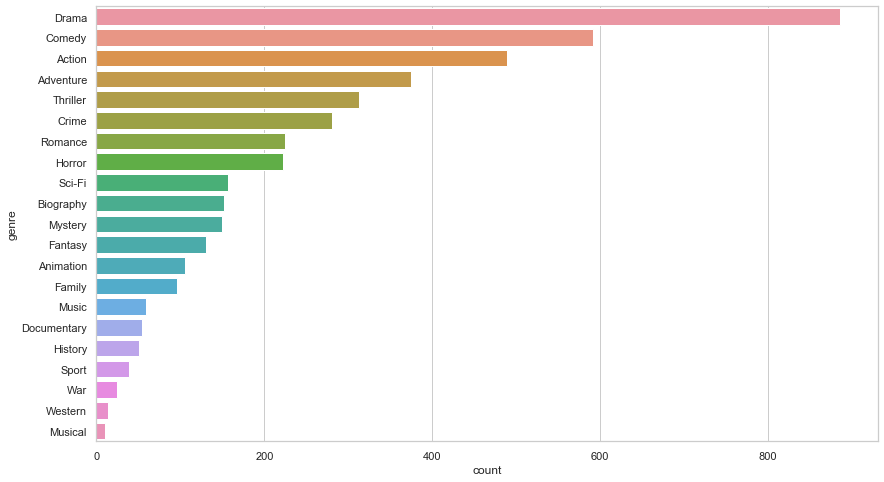

In [468]:
sns.countplot(y='genre',data=expand_df,order=expand_df.genre.value_counts().index)

## Filter genres to the top 13

In [487]:
def filter_df_by_field_count(dframe,field,count):
    return dframe[dframe[field].isin(dframe[field].value_counts()[lambda ct: ct >= 100].index)]

clip_df = filter_df_by_field_count(expand_df,'genre',100)

In [488]:
full_expand_df = expand_df.copy()
expand_df = clip_df

## Plot genre vs. profit

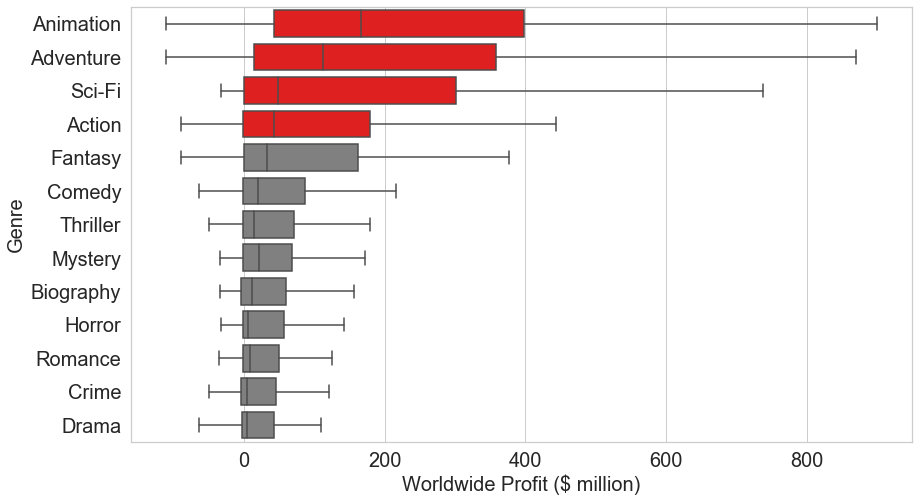

In [489]:
import movie_charts as mc
importlib.reload(mc)
mc.make_genre_boxplot(expand_df,'profit',value_num=13,
                      highlight_list=['Action','Adventure','Sci-Fi','Animation'],
                   	  xlabel='Worldwide Profit ($ million)',
                      ylabel='Genre')

## Plot genre vs. worldwide gross

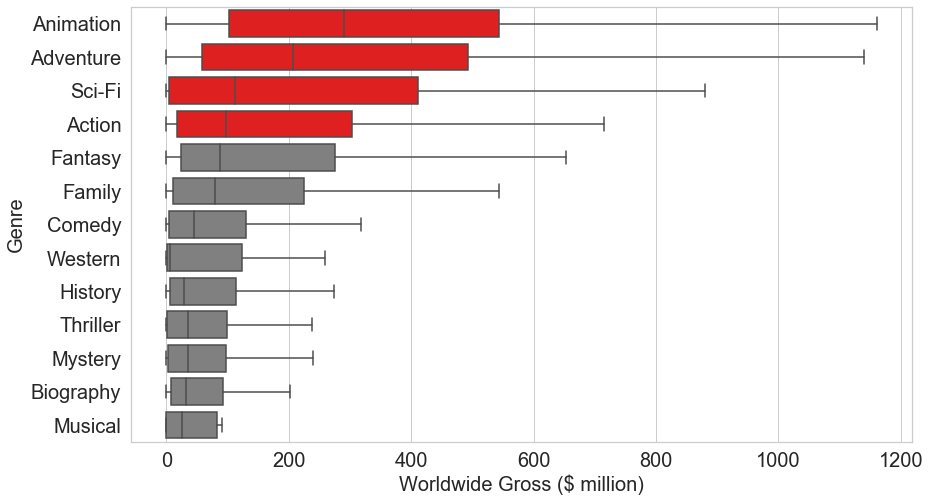

In [447]:
mc.make_genre_boxplot(expand_df,'worldwide_gross',value_num=13,
                   highlight_list=['Action','Adventure','Sci-Fi','Animation'],
                   xlabel='Worldwide Gross ($ million)',
                   ylabel='Genre')

## Plot genre vs. budget

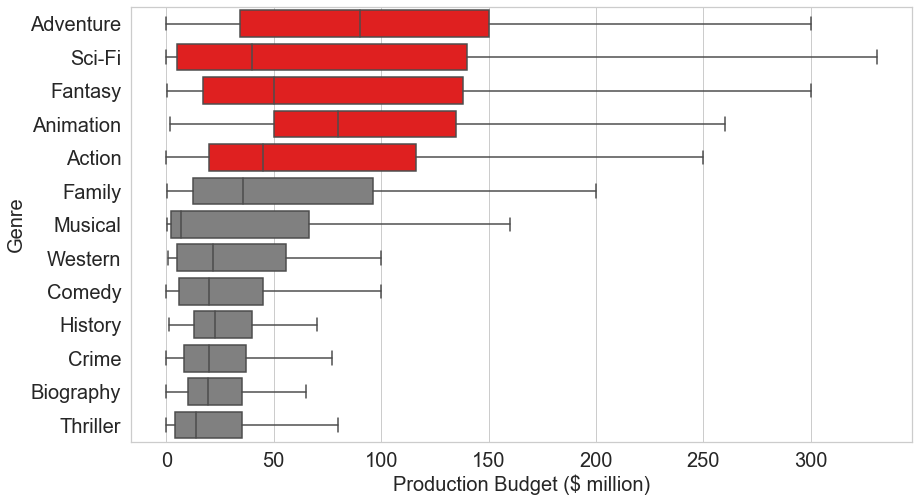

In [472]:
mc.make_genre_boxplot(expand_df,'production_budget',value_num=13,
                   highlight_list=['Action','Adventure','Sci-Fi','Animation','Fantasy'],
                   xlabel='Production Budget ($ million)',
                   ylabel='Genre')

## Plot genre vs. ROI

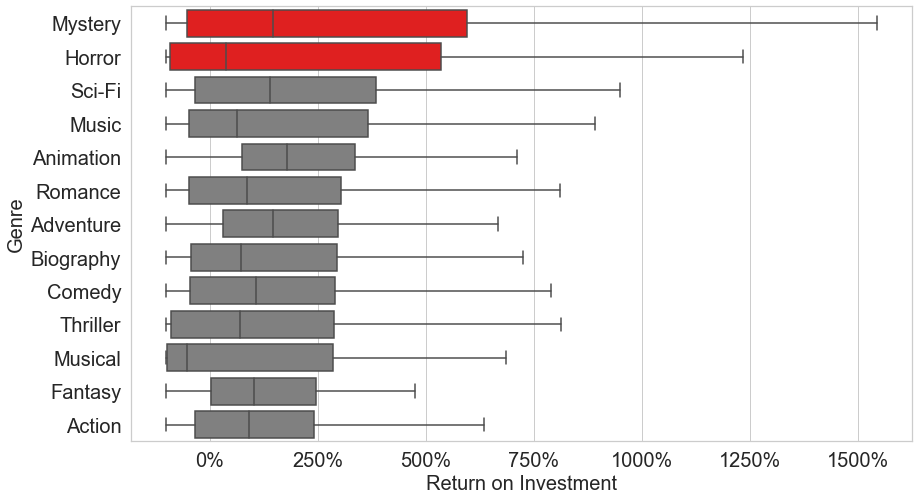

In [454]:
mc.make_genre_boxplot(expand_df,'roi',value_num=13,
                   highlight_list=['Horror','Mystery'],
                   xlabel='Return on Investment',
                   ylabel='Genre',
                   formatx_as_percent=True)

# Scatterplot of ROI vs budget colored by genre

In [451]:
expand_df['horror'] = np.where(expand_df['genre']=='Horror', 'Horror', 'Not Horror')

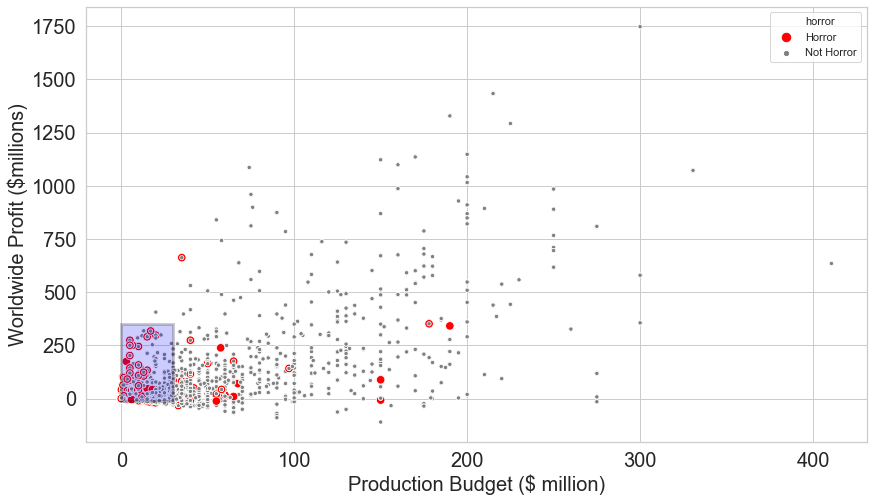

In [459]:
import matplotlib.patches as patches
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style('whitegrid')

genre_list = expand_df.groupby('genre').max().sort_values(ascending=False, 
                                                   by='roi')[:13].index.to_list()
palette = ['gray']*10
palette[0]='red'
splot = sns.scatterplot(data=expand_df[expand_df['genre'].isin(genre_list)],
                        x='production_budget',
                        y='profit',
                        hue='horror',
                        size='horror',
                        palette=['red','gray'],
                        hue_order=['Horror','Not Horror'],
                        size_order=['Horror','Not Horror'])
splot.set_xlabel("Production Budget ($ million)",fontsize=20)
splot.set_ylabel("Worldwide Profit ($millions)",fontsize=20)
splot.tick_params(labelsize=20)
#plt.xlim(None,300)
#plt.ylim(None,1000)
splot.add_patch(patches.Rectangle((0, -10), # (x,y)
                                    30, # width
                                    360, # height
                                    alpha=0.2, 
                                    facecolor="blue",
                                    edgecolor="black", 
                                    linewidth=3,
                                    linestyle='solid'));


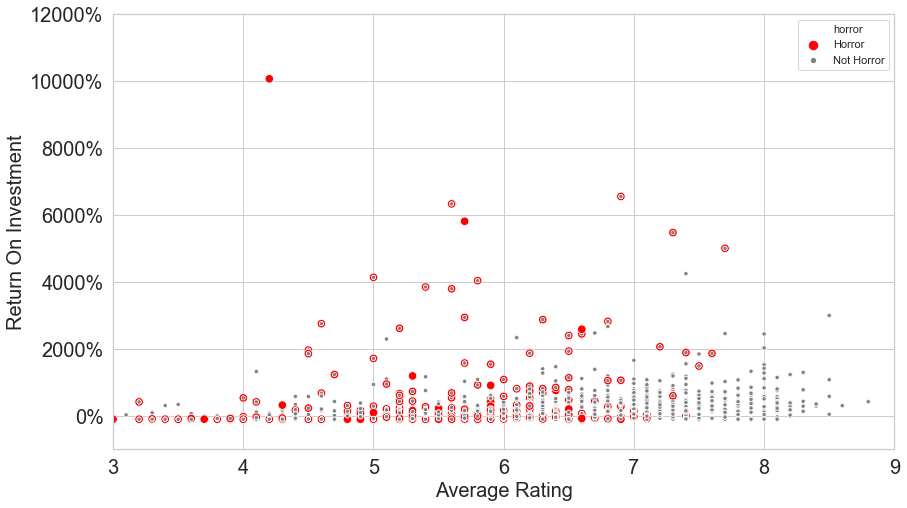

In [460]:
genre_list = expand_df.groupby('genre').max().sort_values(ascending=False, 
                                                   by='roi')[:13].index.to_list()
palette = ['gray']*10
palette[0]='red'
splot = sns.scatterplot(data=expand_df[expand_df['genre'].isin(genre_list)],
                        x='averagerating',
                        y='roi',
                        hue='horror',
                        size='horror',
                        palette=['red','gray'],
                        hue_order=['Horror','Not Horror'],
                        size_order=['Horror','Not Horror'])
splot.set_xlabel("Average Rating",fontsize=20)
splot.set_ylabel("Return On Investment",fontsize=20)
splot.tick_params(labelsize=20)
plt.xlim(3,9)
plt.ylim(-10,120)
splot.set_yticklabels(['{0:.0%}'.format(x) for x in splot.get_yticks()]);

# Looking at genre combinations

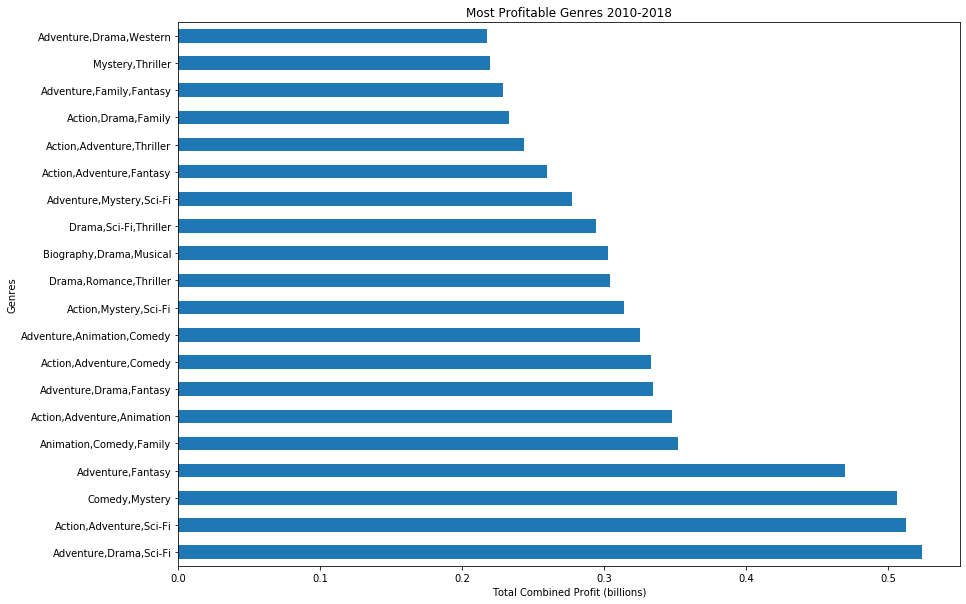

In [15]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

df.groupby('genres').sum().sort_values(ascending=False, 
                                                   by='profit')['profit'][:20].div(1000).plot.barh()

ax.set_xlabel('Total Combined Profit (billions)')
ax.set_ylabel('Genres')
ax.set_title('Most Profitable Genres 2010-2018');


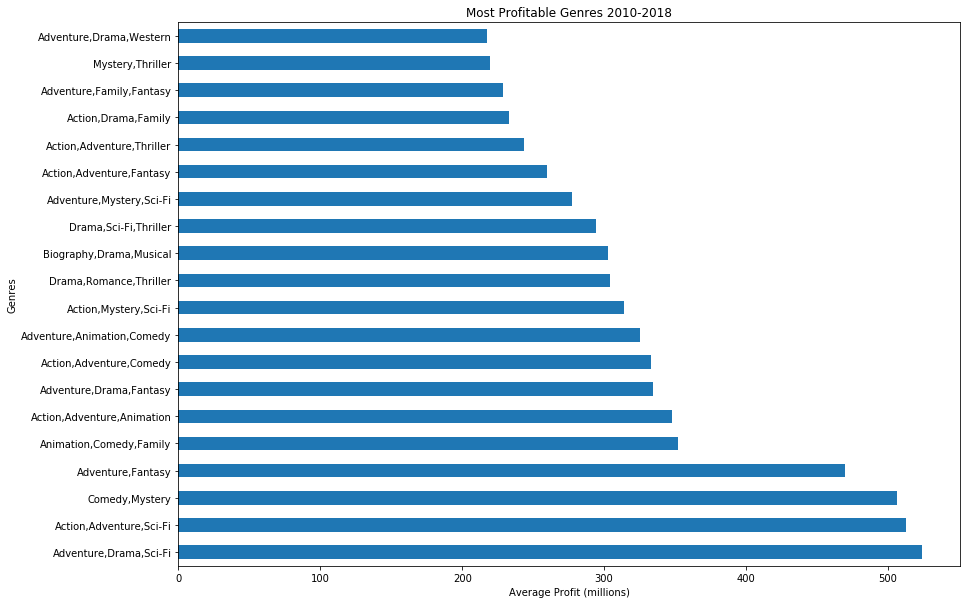

In [16]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

df.groupby('genres').mean().sort_values(ascending=False, 
                                                   by='profit')['profit'][:20].plot.barh()

ax.set_xlabel('Average Profit (millions)')
ax.set_ylabel('Genres')
ax.set_title('Most Profitable Genres 2010-2018');

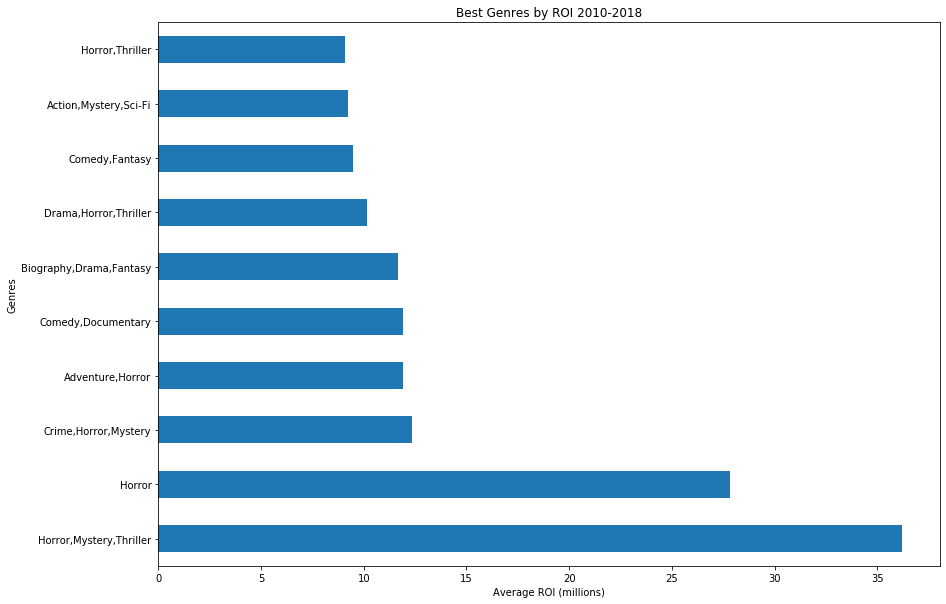

In [18]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)

df.groupby('genres').mean().sort_values(ascending=False, 
                                                   by='roi')['roi'][:10].plot.barh()

ax.set_xlabel('Average ROI (millions)')
ax.set_ylabel('Genres')
ax.set_title('Best Genres by ROI 2010-2018');